# Mathematical Underpinnings - Lab 9

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
np.random.seed(123)

## Task 1

### a)

In [3]:
n = 500
mu0 = 1.0
mu1 = 5.0
sigma0 = np.sqrt(1.0)
sigma1 = np.sqrt(2.0)
pi0 = 0.3
pi1 = 0.7

In [4]:
sample = np.where(
    np.random.binomial(1, pi0, n),
    np.random.normal(mu0, sigma0, n),
    np.random.normal(mu1, sigma1, n),
)

In [5]:
def plot_histogram(sample):
    plt.hist(sample, bins=round(np.sqrt(len(sample))), density=True)

In [6]:
def plot_density(mu0, mu1, sigma0, sigma1, pi0, pi1, label=None):
    x = np.linspace(
        min(mu0 - 3 * sigma0, mu1 - 3 * sigma1),
        max(mu0 + 3 * sigma0, mu1 + 3 * sigma1),
        100,
    )
    y = pi0 * norm.pdf(x, mu0, sigma0) + pi1 * norm.pdf(x, mu1, sigma1)
    plt.plot(x, y, label=label)

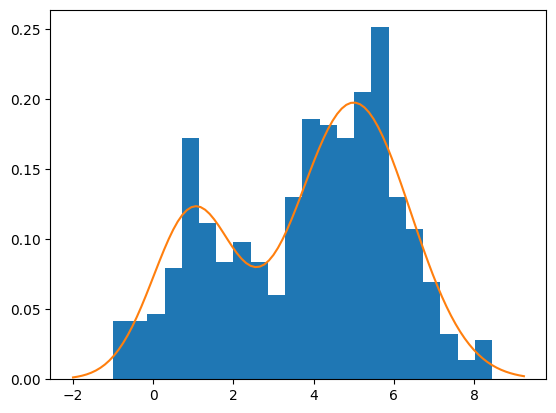

In [7]:
plot_histogram(sample)
plot_density(mu0, mu1, sigma0, sigma1, pi0, pi1)

### b)

$$\sum_{i=1}^n\log(p(x_i,G_i=g_i|\theta))=\sum_{i=1}^n(1-g_i)(\log(\pi_0)+\log(\phi_{\mu_0,\sigma^2_0}(x_i)))+g_i(\log(\pi_1)+\log(\phi_{\mu_1,\sigma^2_1}(x_i)))$$

### c)

$$\hat{\gamma}_i=\frac{\hat{\pi}_1\phi_{\hat{\mu}_1,\hat{\sigma}^2_1}(x_i)}{\hat{\pi}_0\phi_{\hat{\mu}_0,\hat{\sigma}^2_0}(x_i)+\hat{\pi}_1\phi_{\hat{\mu}_1,\hat{\sigma}^2_1}(x_i)}$$

### d)

$$\hat{\mu}_0=\frac{\sum_{i=1}^n(1-\hat{\gamma}_i)x_i}{\sum_{i=1}^n(1-\hat{\gamma}_i)}, \hat{\mu}_1=\frac{\sum_{i=1}^n\hat{\gamma}_i x_i}{\sum_{i=1}^n\hat{\gamma}_i}$$


$$\hat{\sigma}^2_0=\frac{\sum_{i=1}^n(1-\hat{\gamma}_i)(x_i-\hat{\mu}_0)^2}{\sum_{i=1}^n(1-\hat{\gamma}_i)}, \hat{\sigma}^2_1=\frac{\sum_{i=1}^n\hat{\gamma}_i(x_i-\hat{\mu}_1)^2}{\sum_{i=1}^n\hat{\gamma}_i}$$

$$\hat{\pi}_0=\frac{\sum_{i=1}^n{1-\hat{\gamma}_i}}{n}, \hat{\pi}_1=\frac{\sum_{i=1}^n{\hat{\gamma}_i}}{n}$$

### e)

In [8]:
def em2gm(sample, mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, tol=1e-3):
    pi0_hat = pi1_hat = 0.5
    last_ll_hat = -np.inf
    n_iter = 0

    while True:
        n_iter += 1

        # E step
        gamma_hat = (
            pi1_hat
            * norm.pdf(sample, mu1_hat, sigma1_hat)
            / (
                pi0_hat * norm.pdf(sample, mu0_hat, sigma0_hat)
                + pi1_hat * norm.pdf(sample, mu1_hat, sigma1_hat)
            )
        )

        # M step
        mu0_hat = np.sum((1 - gamma_hat) * sample) / np.sum(1 - gamma_hat)
        mu1_hat = np.sum(gamma_hat * sample) / np.sum(gamma_hat)
        sigma0_hat = np.sqrt(
            np.sum((1 - gamma_hat) * (sample - mu0_hat) ** 2) / np.sum(1 - gamma_hat)
        )
        sigma1_hat = np.sqrt(
            np.sum(gamma_hat * (sample - mu1_hat) ** 2) / np.sum(gamma_hat)
        )
        pi0_hat = np.sum(1 - gamma_hat) / len(sample)
        pi1_hat = np.sum(gamma_hat) / len(sample)

        ll_hat = np.sum(
            (1 - gamma_hat) * np.log(norm.pdf(sample, mu0_hat, np.sqrt(sigma0_hat)))
            + gamma_hat * np.log(norm.pdf(sample, mu1_hat, np.sqrt(sigma1_hat)))
        )

        if ll_hat - last_ll_hat < tol:
            break
        last_ll_hat = ll_hat

    print(f"Converged after {n_iter:d} iterations.")
    return mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat

### f)

In [9]:
mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat = em2gm(
    sample, mu0_hat=0.0, mu1_hat=1.0, sigma0_hat=1.0, sigma1_hat=1.0
)

Converged after 55 iterations.


In [10]:
print(f"""
mu0_hat: {mu0_hat:.2f}
mu1_hat: {mu1_hat:.2f}
sigma0_hat: {sigma0_hat:.2f} (√{sigma0_hat**2:.2f})
sigma1_hat: {sigma1_hat:.2f} (√{sigma1_hat**2:.2f})
pi0_hat: {pi0_hat:.2f}
pi1_hat: {pi1_hat:.2f}
""")


mu0_hat: 1.12
mu1_hat: 5.03
sigma0_hat: 0.95 (√0.89)
sigma1_hat: 1.27 (√1.61)
pi0_hat: 0.30
pi1_hat: 0.70



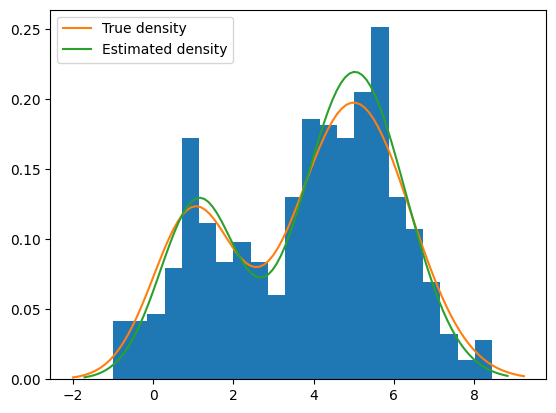

In [11]:
plot_histogram(sample)
plot_density(
    mu0,
    mu1,
    sigma0,
    sigma1,
    pi0,
    pi1,
    label="True density",
)
plot_density(
    mu0_hat,
    mu1_hat,
    sigma0_hat,
    sigma1_hat,
    pi0_hat,
    pi1_hat,
    label="Estimated density",
)
plt.legend();